#PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE  ́

##Facultad de Matemática

##EPG4002 - Aprendizaje No Supervisado

##Profesor: Jonathan Acosta

##Alumno: Ronald Castillo

###Laboratorio N°1

###Segundo bimestre

__Objetivo__: Aplicar las técnicas de conglomerados jerárquicos y no jerárquico (K-means) e interpretar
sus resultados.

__Preguntas__: Utilice el conjunto de datos “iris” disponibles en Python.


In [39]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris(return_X_y=True, as_frame=True)
IRIS=iris[0].copy()
IRIS["target"]=iris[1]
IRIS

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

1. (10 pts) Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarización de las variables cuantitativas?.

In [40]:
iris[0].describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

No se justifica una estandarización, por que los promedios y desviacion estandart de las columnas, son similares entre sí en orden de magnitud.

2. (25 pts) Utilice sólo las variables cuantitativas para agrupar los observaciones mediante:
  * El método de enlace simple.
  * El método de enlace completo.
  * El método de enlace promedio.
  * El método de enlace ward.

Visualice los agrupamiento mediante sus respectivos dendrograma.
Escoja uno de los métodos aglomerativos, con este, crear 3 grupos y comparar los cluster obtenidos, en términos de promedio y desviación estándar.

In [41]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

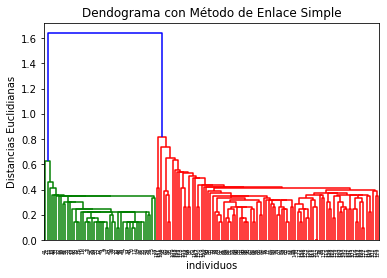

In [42]:
# Creamos el dendograma con el método de enlace simple
dendrogram1 = sch.dendrogram(sch.linkage(iris[0], method = 'single'))
plt.title('Dendograma con Método de Enlace Simple')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

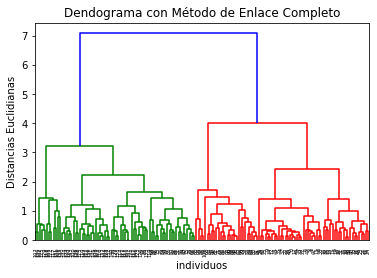

In [43]:
# Creamos el dendograma con el método de enlace completo

dendrogram1 = sch.dendrogram(sch.linkage(iris[0], method = 'complete'))
plt.title('Dendograma con Método de Enlace Completo')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

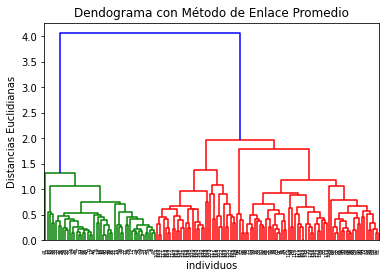

In [44]:
# Creamos el dendograma con el método de enlace promedio

dendrogram1 = sch.dendrogram(sch.linkage(iris[0], method = 'average'))
plt.title('Dendograma con Método de Enlace Promedio')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

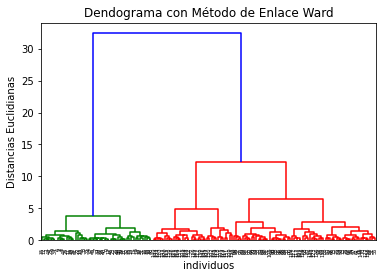

In [45]:
# Creamos el dendograma con el método de enlace ward

dendrogram1 = sch.dendrogram(sch.linkage(iris[0], method = 'ward'))
plt.title('Dendograma con Método de Enlace Ward')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Grafica del Clusters Jerárquico Método de Enlace Ward al conjunto de datos


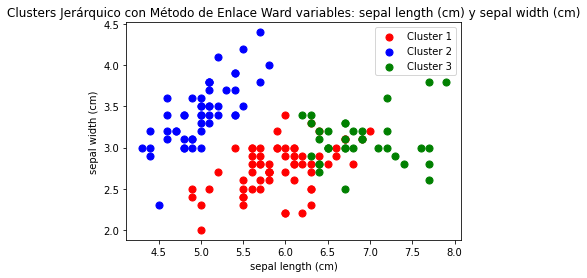

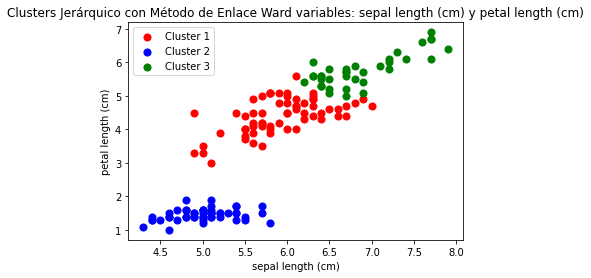

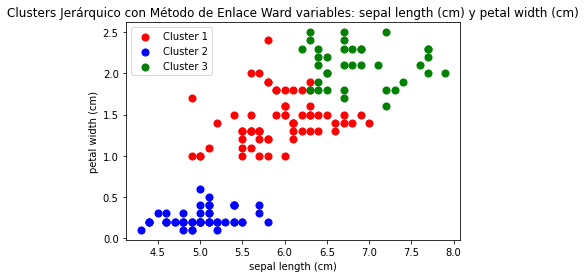

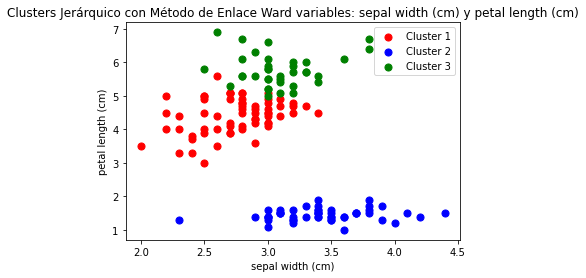

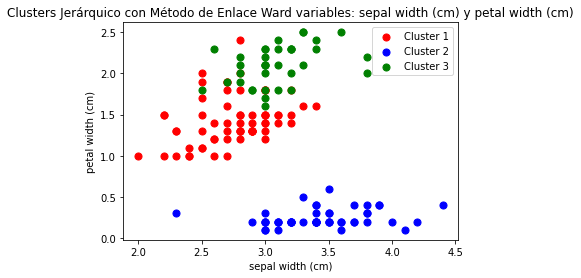

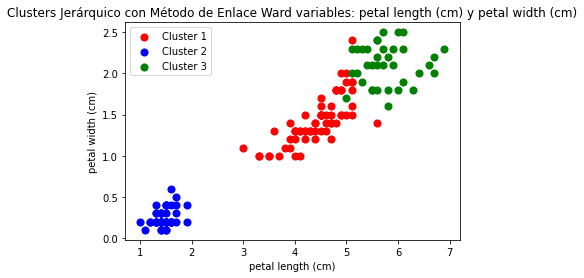

In [46]:
# Ajustando Clusters Jerárquico Ward al conjunto de datos
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')

dfw=iris[0].copy()
dfw['label'] = hc.fit_predict(iris[0])


from itertools import combinations
comb=combinations(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 2)
for x in list(comb): 
  plt.scatter(dfw.loc[dfw.label==0,x[0]],dfw.loc[dfw.label==0,x[1]], s = 50, c = 'red', label = 'Cluster 1')
  plt.scatter(dfw.loc[dfw.label==1,x[0]],dfw.loc[dfw.label==1,x[1]], s = 50, c = 'blue', label = 'Cluster 2')
  plt.scatter(dfw.loc[dfw.label==2,x[0]],dfw.loc[dfw.label==2,x[1]], s = 50, c = 'green', label = 'Cluster 3')

  plt.title(f'Clusters Jerárquico con Método de Enlace Ward variables: {x[0]} y {x[1]}')
  plt.xlabel(x[0])
  plt.ylabel(x[1])
  plt.legend()
  plt.show()

### Valores estadisticos por clusters para método de enlace Ward

In [47]:
# Ajustando Clusters Jerárquico Ward al conjunto de datos

X=[]
for i in range(3):
  y=dfw.loc[dfw.label==i].drop(columns=['label']).describe().loc[['mean','std']]
  y['cluster']=i+1
  X+=[y]
pd.concat(X,axis=0)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
mean           5.920313          2.751563           4.420313   
std            0.476155          0.295464           0.526498   
mean           5.006000          3.428000           1.462000   
std            0.352490          0.379064           0.173664   
mean           6.869444          3.086111           5.769444   
std            0.491540          0.287007           0.480369   

      petal width (cm)  cluster  
mean          1.434375        1  
std           0.292889        1  
mean          0.246000        2  
std           0.105386        2  
mean          2.105556        3  
std           0.243715        3

Lo que se puede apreciar en la tabla anterior, es que relativamente los cluster tienen similares desviaciones standarts, ya que mantienen el mismo orden de magnitud, y los promedios estan algo proximos en algunas variables (ejemplo: las variables sepal length (cm) [los clusters 2 y 3], sepal width (cm) [los clusters 1 y 3]), pero en otras no (ejemplo: las variables petal length (cm) [todos los clusters], sepal width (cm) [los clusters 2 y 3]), por lo que se podria decir, que estan relativamente bien separados, ademas en la grafica donde se puede apreciar la mejor separacion entre los clusters es en la grafica con las variables _sepal width (cm)_ y _petal length (cm)_.

3. (10 pts extras) Utilice sólo las variables cuantitativas para agrupar los observaciones mediante el método de aglomeramiento divisivo. Visualice el agrupamiento mediante un dendrograma.
Crear 3 grupos y comparar los cluster obtenidos, en términos de promedio y desviación estándar.

In [48]:
# Dissimilarity matrix
DD=pd.DataFrame(map(lambda i:((iris[0]-iris[0].loc[i])**2).sum(1)**.5, iris[0].index))
# Create splinter and remaining group
remaining = DD.index.tolist()
clusters=3
def div(DD,remaining): 
  ra = DD.sum(1).idxmax()
  splinter = [ra]
  remaining1=list(set(remaining)-{ra})

  # Check every record in remaining  and moves the record if record is closer to splinter
  bChanged = True
  while bChanged:
    bChanged = False
    for i in remaining1:
      d1 =DD.loc[i,splinter].mean()
      d2 = DD.loc[i,remaining1].sum()
      if len(remaining1) > 1:
        d2 /= (len(remaining1) - 1.0)
      if d1 < d2:
        bChanged = True
        if i not in splinter:
          splinter+=[i]
        if i in remaining1: 
          remaining1=list(set(remaining1)-{i})
        break
  return remaining1,splinter

C=[]
a=remaining
while len(C)<clusters:
  a,b=div(DD.loc[a,a],a)
  C+=[b]
  if len(b)<3:
    C+=[b]

In [49]:
C=[]
a=remaining
while len(C)<3:
  a,b=div(DD.loc[a,a],a)
  C+=[b]
  if len(a)<3:
    C+=[a]
X=[]
D=[]
for j,i in enumerate(C):
  x=iris[0].loc[i]
  y=x.describe().loc[['mean','std']]
  y['cluster']=j+1
  x['cluster']=j+1
  D+=[x]
  X+=[y]
pd.concat(X,axis=0)
D=pd.concat(D,axis=0)

4. (10 pts) Realice un agrupamiento considerando 3 grupos utilizando la técnica K-medias. Comparar los cluster obtenidos, en términos de promedio y desviación estándar.

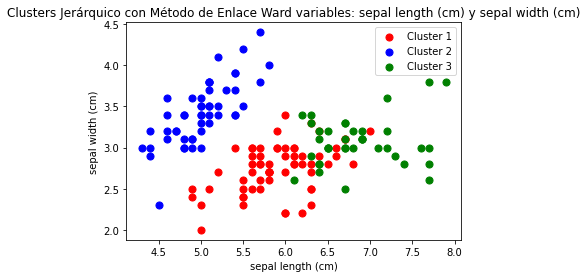

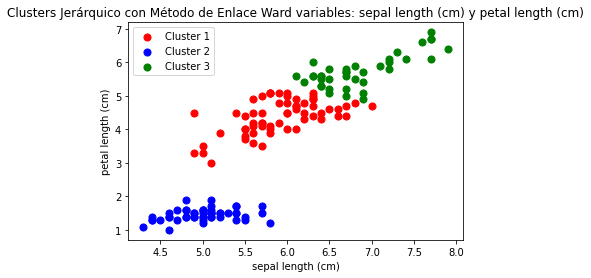

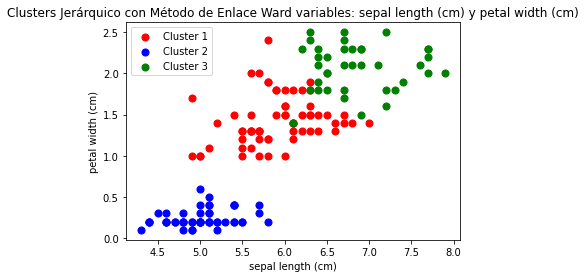

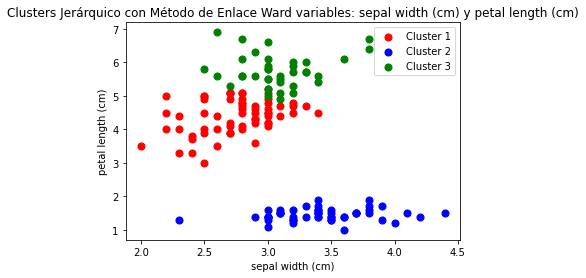

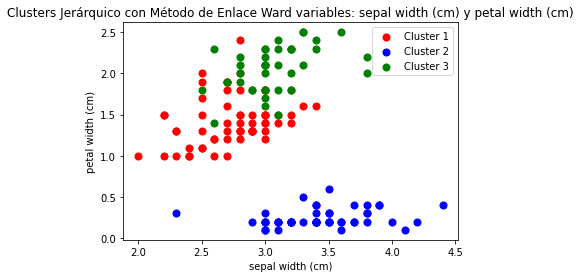

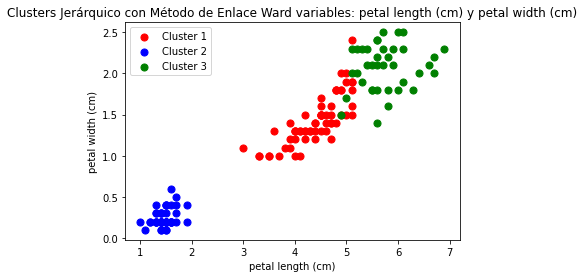

In [50]:
from sklearn import cluster

km = cluster.KMeans(n_clusters = 3)
dfkm=iris[0].copy()
dfkm['label'] = km.fit_predict(iris[0])


from itertools import combinations
comb=combinations(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 2)
for x in list(comb): 
  plt.scatter(dfkm.loc[dfkm.label==0,x[0]],dfkm.loc[dfkm.label==0,x[1]], s = 50, c = 'red', label = 'Cluster 1')
  plt.scatter(dfkm.loc[dfkm.label==1,x[0]],dfkm.loc[dfkm.label==1,x[1]], s = 50, c = 'blue', label = 'Cluster 2')
  plt.scatter(dfkm.loc[dfkm.label==2,x[0]],dfkm.loc[dfkm.label==2,x[1]], s = 50, c = 'green', label = 'Cluster 3')

  plt.title(f'Clusters Jerárquico con Método de Enlace Ward variables: {x[0]} y {x[1]}')
  plt.xlabel(x[0])
  plt.ylabel(x[1])
  plt.legend()
  plt.show()

In [51]:
# Ajustando Clusters Kmeans al conjunto de datos

X=[]
for i in range(3):
  y=dfkm.loc[dfkm.label==i].drop(columns=['label']).describe().loc[['mean','std']]
  y['cluster']=i+1
  X+=[y]
pd.concat(X,axis=0)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
mean           5.901613          2.748387           4.393548   
std            0.466410          0.296284           0.508895   
mean           5.006000          3.428000           1.462000   
std            0.352490          0.379064           0.173664   
mean           6.850000          3.073684           5.742105   
std            0.494155          0.290092           0.488590   

      petal width (cm)  cluster  
mean          1.433871        1  
std           0.297500        1  
mean          0.246000        2  
std           0.105386        2  
mean          2.071053        3  
std           0.279872        3

5. (15 pts) Considere el caso particular de 3 grupos, compare los cluster obtenidos en (2), (3) y (4), con los grupos formados por la variable especie. ¿Cuál de las técnicas anteriores se acerca más al agrupamiento original?

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy del cluster ward:",accuracy_score(IRIS.target,dfw.label))
print("Accuracy del cluster por divicion:",accuracy_score(IRIS.target,D.cluster))
print("Accuracy del cluster kmean:",accuracy_score(IRIS.target,dfkm.label))

Accuracy del cluster ward: 0.23333333333333334


ValueError: ignored